# Data Wrangling for Capstone 1
Now that you have a basic ideas of the various data wrangling steps and techniques available, let's apply it to your Capstone Project! By now, you probably have a data set in mind for your project (If you don't have a data set yet, come back to this assignment once you have one). Apply some of the data wrangling techniques you have learned to this data set.

Submission: Create a short document (1-2 pages) in your github describing the data wrangling steps that you undertook to clean your capstone project data set. What kind of cleaning steps did you perform? How did you deal with missing values, if any? Were there outliers, and how did you decide to handle them? This document will eventually become part of your milestone report.

Submit a link to this document. 

## 
hypothesis: 
go and submit a set of questions that I'm going to ask
then we can discuss 

## Import packages and dataset

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load data
df=pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')

#examine the dataset
df.describe()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## User_Score datatype

It looks like 'User_Score' column is 'object' type, which seemed to be weird considering it was supposed to be all numbers


In [132]:
df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Upon inspection, it looks like 'User_Score' column has string 'tbd' in it. I decide to treat it as NA as convert it to numeric type

In [140]:
df['User_Score']=pd.to_numeric(df['User_Score'],errors='coerce')

## Missing Review scores
About half of the dataset doesn't have a critic nor a user score, which is the critical element for my analysis, are they all old games before the prevalence of internet and online review scores?

To find this out, I will compute the percentages of games that did not have critic scores of each year, and plot it with a bar chart

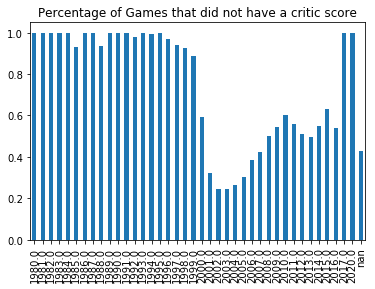

In [196]:
dfna=df.loc[df['Critic_Score'].isnull()]

nayear=dfna['Year_of_Release'].value_counts(dropna=False).sort_index()
year=df['Year_of_Release'].value_counts(dropna=False).sort_index()
years=pd.DataFrame({'NA':nayear,'ALL': year})
years['NApct']=years['NA']/years['ALL']

years.NApct.plot(kind='bar',title="Percentage of Games that did not have a critic score")
plt.show()


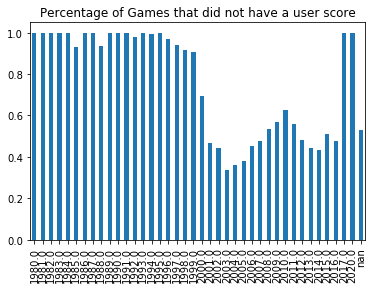

In [180]:
dfna2=df.loc[df['User_Score'].isnull()]

nayear=dfna2['Year_of_Release'].value_counts(dropna=False).sort_index()
year=df['Year_of_Release'].value_counts(dropna=False).sort_index()
years=pd.DataFrame({'NA':nayear,'ALL': year})
years['NApct']=years['NA']/years['ALL']

years.NApct.plot(kind='bar',title="Percentage of Games that did not have a user score")
plt.show()


It's pretty clear from the charts that most games that came out before 2000 did not have a critic score or a user_score, which coincided with the the incredible growth of the Internet since 2000. 

Also, it seemed that the dataset did not quite get updated with the game releases after 2016. 

So this analysis is mainly focused on the games with critic scores AND user scores from 2000 to 2016.

In [181]:
#Filter the dataset: only keeping rows with both Critic_Score and User_Score, with release date between 2000-2016
newdf=df.loc[df['Critic_Score'].notnull()]
newdf=newdf.loc[newdf['User_Score'].notnull()]
newdf=newdf[(newdf.Year_of_Release<2017) & (newdf.Year_of_Release>1999)]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6812 entries, 0 to 16709
Data columns (total 16 columns):
Name               6812 non-null object
Platform           6812 non-null object
Year_of_Release    6812 non-null float64
Genre              6812 non-null object
Publisher          6811 non-null object
NA_Sales           6812 non-null float64
EU_Sales           6812 non-null float64
JP_Sales           6812 non-null float64
Other_Sales        6812 non-null float64
Global_Sales       6812 non-null float64
Critic_Score       6812 non-null float64
Critic_Count       6812 non-null float64
User_Score         6812 non-null float64
User_Count         6812 non-null float64
Developer          6808 non-null object
Rating             6747 non-null object
dtypes: float64(10), object(6)
memory usage: 904.7+ KB


## Normalizing User_scores
It looks like User_Scores are plotted on a scale of 0-10 while Critic_Score is plotted on 0-100, let's put them on the same scale by multiplying User_Scores by 100

In [182]:
newdf.User_Score=newdf.User_Score.values*10

## Did the game review score shift overtime?
To find out this question, I can plot a time series of the mean critic_score.

In [197]:
# Group df by 'Year_of_Release': by_year
by_year = newdf.groupby('Year_of_Release')

# Select 'age' and 'fare'
by_year_sub = by_year[['Critic_Score','User_Score']]

# Aggregate by_class_sub by 'max' and 'median': aggregated
aggregated = by_year_sub.agg(['mean'])

aggregated

,Critic_Score,User_Score
,mean,mean
Year_of_Release,,
2000.0,72.176471,75.362745
2001.0,72.726562,75.957031
2002.0,70.826374,75.945055
2003.0,71.563126,78.755511
2004.0,70.928721,77.383648
2005.0,70.202847,75.145907
2006.0,68.393939,72.797348
2007.0,67.418644,69.266102


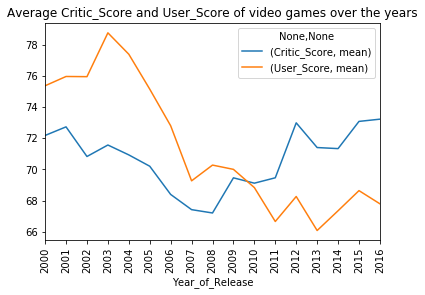

In [195]:
aggregated.plot(title='Average Critic_Score and User_Score of video games over the years')
plt.xticks(aggregated.index,rotation=90)
plt.show()

Interestingly, it looks like:

1. both mean critic scores and user scores hit a high point in 2003, and both kept declining until 2007

2. Before 2010, mean user scores are generally higher than mean critic score, however, it went the other way from 2010 to 2016

3. The mean critic score was in an upward trend since 2010, while user score kind of swing between 66-69 since 2010

## Discrepancies between critics and users score?

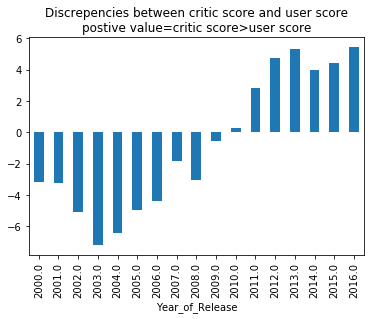

In [213]:
aggregated['Discrepency']=aggregated.iloc[:,0]-aggregated.iloc[:,1]
aggregated['Discrepency'].plot(kind='bar',title='Discrepencies between critic score and user score\npostive value=critic score>user score')
plt.show()

## Critic score and NA sales

In [274]:
plt.scatter(newdf.Critic_Score,newdf.NA_Sales)


ValueError: x and y must be the same size

It looks like a game sold particularly well, upon inspection, it's Wii Sports which was bundled with the wii console, so we should probably exclude it from our future analysis that involve sale figurs 

In [265]:
newdf.iloc[newdf.NA_Sales.idxmax(),]

Name               Wii Sports
Platform                  Wii
Year_of_Release          2006
Genre                  Sports
Publisher            Nintendo
NA_Sales                41.36
EU_Sales                28.96
JP_Sales                 3.77
Other_Sales              8.45
Global_Sales            82.53
Critic_Score               76
Critic_Count               51
User_Score                 80
User_Count                322
Developer            Nintendo
Rating                      E
Name: 0, dtype: object